# Assignment 2
## Saving data in 2 parallel matrices, features(x) and labels(y)

pip install -U scikit-learn

#### Retreiving the x and y array generated in another notebook after encoding the dataset

In [4]:
%store -r X

print(X)

[[18.5 19.7 22.4 ... 18.9 18.6  1. ]
 [23.7 36.3  2.2 ... 26.5 34.1  1. ]
 [18.4 27.5  0.  ... 19.7 24.4  0. ]
 ...
 [10.  20.1  0.  ... 14.3 19.   0. ]
 [ 9.9 25.3  0.  ... 14.4 24.5  0. ]
 [14.4 19.8 13.2 ... 15.4 16.6  1. ]]


In [5]:
%store -r Y
print(Y)

[1 1 1 ... 0 0 0]


In [6]:
import pandas as pd
from sklearn import tree

## Performing Random Splits

In [9]:
from sklearn.model_selection import train_test_split

In [16]:
for i in range(10):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

    clf = tree.DecisionTreeClassifier(min_samples_split=40)

    clf = clf.fit(X_train, Y_train)

    y_pred = clf.predict(X_test)

    print('(Training, Testing) Accuracy Result ' ,i+1,': ', clf.score(X_train, Y_train), ', ', clf.score(X_test, Y_test)) 
    #training accuracy and testing /prediction accuracy


(Training, Testing) Accuracy Result  1 :  0.8958837772397095 ,  0.7536231884057971
(Training, Testing) Accuracy Result  2 :  0.8813559322033898 ,  0.7681159420289855
(Training, Testing) Accuracy Result  3 :  0.8789346246973365 ,  0.7971014492753623
(Training, Testing) Accuracy Result  4 :  0.8619854721549637 ,  0.7922705314009661
(Training, Testing) Accuracy Result  5 :  0.8825665859564165 ,  0.7681159420289855
(Training, Testing) Accuracy Result  6 :  0.8837772397094431 ,  0.7729468599033816
(Training, Testing) Accuracy Result  7 :  0.8777239709443099 ,  0.8164251207729468
(Training, Testing) Accuracy Result  8 :  0.8789346246973365 ,  0.7922705314009661
(Training, Testing) Accuracy Result  9 :  0.8753026634382567 ,  0.7777777777777778
(Training, Testing) Accuracy Result  10 :  0.8813559322033898 ,  0.7681159420289855


## K-Fold Cross Validation

In [17]:
from sklearn.model_selection import cross_validate

cv_result = cross_validate(clf, X, Y, cv=5)

print(cv_result)

{'fit_time': array([0.00797963, 0.00793982, 0.0069797 , 0.0069828 , 0.00698137]), 'score_time': array([0.        , 0.        , 0.        , 0.00101519, 0.0009973 ]), 'test_score': array([0.71014493, 0.72463768, 0.73429952, 0.77669903, 0.79126214])}


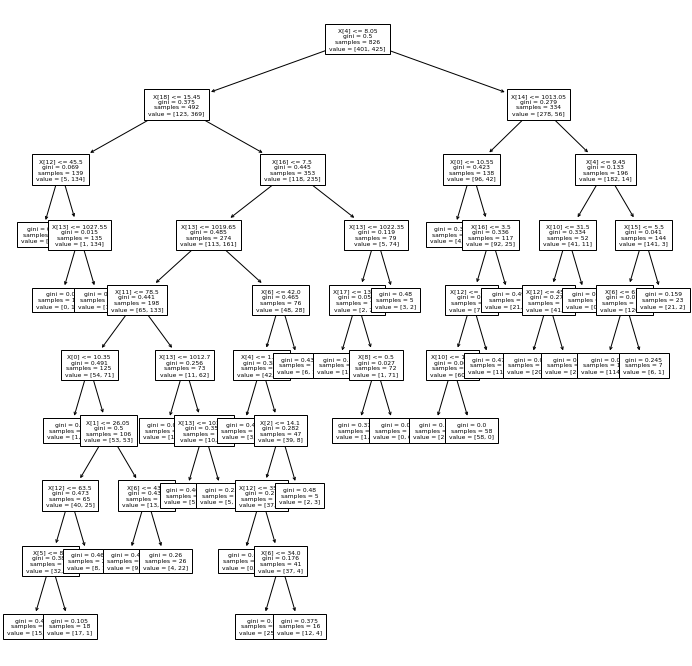

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=6)
plt.show()